In [169]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [76]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

#condensed nearest neighbours


In [77]:
from collections import Counter
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [170]:
df=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_set.csv')
df_ROS=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_ROS.csv')
df_RUS=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_RUS.csv')
df_SMOTE=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_SMOTE.csv')
df_test=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\test_set.csv')
df.head()
x_train=df.iloc[:,:-1]
y_train=df.iloc[:,-1]
x_ov=df_ROS.iloc[:,:-1]
y_ov=df_ROS.iloc[:,-1]
x_under = df_RUS.iloc[:,:-1]
y_under=df_RUS.iloc[:,-1]
x_smote=df_SMOTE.iloc[:,:-1]
y_smote=df_SMOTE.iloc[:,-1]
x_test=df_test.iloc[:,:-1]
y_test=df_test.iloc[:,-1]
accuracy_no_sampling=[]
accuracy_over_sampling=[]
accuracy_under_sampling=[]
accuracy_smote_sampling=[]
f1_no_sampling=[]
f1_over_sampling=[]
f1_under_sampling=[]
f1_smote_sampling=[]

In [217]:
f1_under_sampling=[]
f1_smote_sampling=[]
accuracy_under_sampling=[]
accuracy_smote_sampling=[]

In [172]:
clf =tree.DecisionTreeClassifier()

In [173]:
#nosampling
clf_nosamp=clf.fit(x_train,y_train)
clf_nosamp_prediction=clf_nosamp.predict(x_test)
clf_nosamp_accuracy=accuracy_score(clf_nosamp_prediction,y_test)
clf_nosamp_f1=f1_score(clf_nosamp_prediction,y_test)
clf_nosamp=[clf_nosamp_accuracy,nosamp_f1]
accuracy_no_sampling.append(clf_nosamp_accuracy)
f1_no_sampling.append(clf_nosamp_f1)
f1_no_sampling

[0.41137440758293836]

In [174]:
#oversampling
#now we make the decision tree with our new smaples
clf_oversamp=clf.fit(x_ov,y_ov)
clf_oversamp_prediction=clf_oversamp.predict(x_test)
clf_oversamp_accuracy=accuracy_score(clf_oversamp_prediction,y_test)
clf_oversamp_f1=f1_score(clf_oversamp_prediction,y_test)
clf_oversamp=[oversamp_accuracy,oversamp_f1]
accuracy_over_sampling.append(clf_oversamp_accuracy)
f1_over_sampling.append(clf_oversamp_f1)

In [218]:
#undersampling
print(f"Training target statistics: {Counter(y_under)}")
print(f"Testing target statistics: {Counter(y_test)}")
#here we have undersampled so in the training set there are 2743 in each catagory
#now we make the decision tree with our new smaples
clf_undersamp=clf.fit(x_under,y_under)
clf_undersamp_prediction=clf_undersamp.predict(x_test)
clf_undersamp_accuracy=accuracy_score(clf_undersamp_prediction,y_test)
clf_undersamp_f1=f1_score(undersamp_prediction,y_test)
clf_undersamp=[undersamp_accuracy,undersamp_f1]
accuracy_under_sampling.append(clf_undersamp_accuracy)
f1_under_sampling.append(clf_undersamp_f1)

Training target statistics: Counter({0.0: 4645, 1.0: 4645})
Testing target statistics: Counter({0.0: 3505, 1.0: 995})


In [219]:
#smote sampling
oversample_smote = SMOTE()
clf_oversamp_smote=clf.fit(x_smote,y_smote)
clf_oversamp_smote_prediction=clf_oversamp_smote.predict(x_test)
clf_oversamp_smote_accuracy=accuracy_score(clf_oversamp_smote_prediction,y_test)
clf_oversamp_smote_f1=f1_score(clf_oversamp_smote_prediction,y_test)
clf_smote=[oversamp_smote_accuracy,oversamp_smote_f1]
accuracy_smote_sampling.append(clf_oversamp_smote_accuracy)
f1_smote_sampling.append(clf_oversamp_smote_f1)

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble

In [128]:
#we first find the optimal number of trees in the random forest (TAKES AGES TO RUN) and from the results choose 100 also not sure why zigzag
def optimal_trees(x_train, y_train, array, x_test):
    accuracy_list =[]
    f1_list=[]
    for i in array:
        rfc =ensemble.RandomForestClassifier(n_estimators=i)
        rfc_nosamp=rfc.fit(x_train,y_train)
        rfc_nosamp_prediction=rfc_nosamp.predict(x_test)
        rfc_nosamp_accuracy=accuracy_score(rfc_nosamp_prediction,y_test)
        rfc_nosamp_f1=f1_score(rfc_nosamp_prediction,y_test)
        rfc_nosamp_scores= [rfc_nosamp_accuracy, rfc_nosamp_f1]
        accuracy_list.append(rfc_nosamp_accuracy)
        f1_list.append(rfc_nosamp_f1)
    print(accuracy_list,f1_list)
    plt.plot(array, accuracy_list)
    plt.xlabel('no_of_tres')
    plt.ylabel('score')
    plt.show()
    plt.plot(array, f1_list)
    plt.show()
    return('hi')
 
    

    
    

[0.81, 0.8128888888888889, 0.8193333333333334, 0.816, 0.8191111111111111, 0.8151111111111111, 0.8195555555555556, 0.8215555555555556, 0.8173333333333334, 0.8202222222222222, 0.8175555555555556, 0.8182222222222222, 0.8195555555555556, 0.8182222222222222] [0.46192573945877907, 0.47176913425345046, 0.4811742182514358, 0.4739517153748412, 0.483502538071066, 0.46803069053708446, 0.4873737373737373, 0.49591964846202136, 0.4804045512010114, 0.48569612205975843, 0.48591108328115207, 0.48227848101265824, 0.4873737373737373, 0.48875]


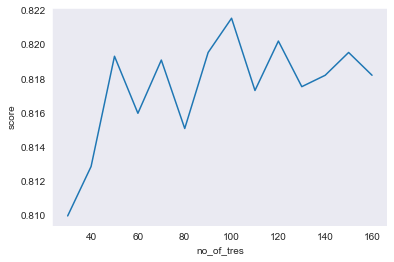

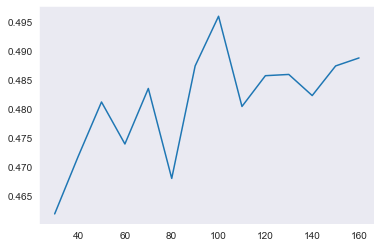

'hi'

In [131]:
optimal_trees(x_train,y_train,[30,40,50,60,70,80,90,100,110,120,130,140,150,160],x_test)

In [ ]:
rfc =ensemble.RandomForestClassifier(n_estimators=100)

In [ ]:
#rfc nosampling
rfc_nosamp=rfc.fit(x_train,y_train)
rfc_nosamp_prediction=rfc_nosamp.predict(x_test)
rfc_nosamp_accuracy=accuracy_score(rfc_nosamp_prediction,y_test)
rfc_nosamp_f1=f1_score(rfc_nosamp_prediction,y_test)
rfc_nosamp_scores= [rfc_nosamp_accuracy, rfc_nosamp_f1]
rfc_nosamp=[rfc_nosamp_scores]
accuracy_no_sampling.append(rfc_nosamp_accuracy)
f1_no_sampling.append(rfc_nosamp_f1)

In [179]:
#rfc oversampling
#now we make the decision tree with our new smaples
rfc_oversamp=rfc.fit(x_ov,y_ov)
rfc_oversamp_prediction=rfc_oversamp.predict(x_test)
rfc_oversamp_accuracy=accuracy_score(rfc_oversamp_prediction,y_test)
rfc_oversamp_f1=f1_score(rfc_oversamp_prediction,y_test)
rfc_oversamp=[rfc_oversamp_accuracy,rfc_oversamp_f1]
accuracy_over_sampling.append(rfc_oversamp_accuracy)
f1_over_sampling.append(rfc_oversamp_f1)

In [220]:
#rfc undersampling
#now we make the decision tree with our new smaples
undersamp_rfc=rfc.fit(x_under,y_under)
rfc_undersamp_prediction=undersamp_rfc.predict(x_test)
rfc_undersamp_accuracy=accuracy_score(rfc_undersamp_prediction,y_test)
rfc_undersamp_f1=f1_score(rfc_undersamp_prediction,y_test)
rfc_undersamp=[rfc_undersamp_accuracy, rfc_undersamp_f1]
accuracy_under_sampling.append(rfc_undersamp_accuracy)
f1_under_sampling.append(rfc_undersamp_f1)

In [221]:
oversample_smote = SMOTE()
rfc_oversamp_smote=rfc.fit(x_smote,y_smote)
rfc_oversamp_smote_prediction=rfc_oversamp_smote.predict(x_test)
rfc_oversamp_smote_accuracy=accuracy_score(rfc_oversamp_smote_prediction,y_test)
rfc_oversamp_smote_f1=f1_score(rfc_oversamp_smote_prediction,y_test)
rfc_smote=[rfc_oversamp_smote_accuracy, rfc_oversamp_smote_f1]
accuracy_smote_sampling.append(rfc_oversamp_smote_accuracy)
f1_smote_sampling.append(rfc_oversamp_smote_f1)

In [182]:
accuracy_no_sampling
accuracy_over_sampling
accuracy_under_sampling
accuracy_smote_sampling
f1_no_sampling
f1_over_sampling
f1_under_sampling
f1_smote_sampling

[0.521193092621664]

In [222]:
print(accuracy_no_sampling)
print(accuracy_over_sampling)
print(accuracy_under_sampling)
print(accuracy_smote_sampling)
print(f1_no_sampling)
print(f1_over_sampling)
print(f1_under_sampling)
print(f1_smote_sampling)

[0.724, 0.8191111111111111]
[0.7331111111111112, 0.8113333333333334]
[0.6164444444444445, 0.7357777777777778]
[0.7071111111111111, 0.8002222222222222]
[0.41137440758293836, 0.48481012658227846]
[0.403378042722305, 0.518434486670448]
[0.4316498316498317, 0.5294815987336763]
[0.4264577893820714, 0.5215540180947312]


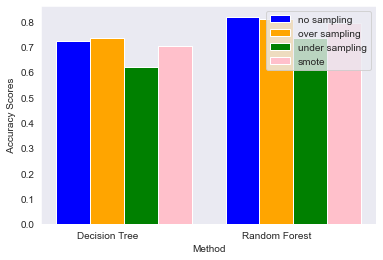

In [214]:
methods=['Decision Tree','Random Forest']
sampling=['no sampling','over sampling','under sampling','smote']
x=np.arange(2)
width=0.2

plt.bar(x-0.2, accuracy_no_sampling, width,color='blue')
plt.bar(x, accuracy_over_sampling, width,color ='orange')
plt.bar(x+0.2, accuracy_under_sampling,width,color='green')
plt.bar(x+0.4, accuracy_smote_sampling, width,color='pink')
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel(' Accuracy Scores')
plt.xlabel('Method')
ax.set_title('Scores by method and sampling')
plt.xticks(x,methods)
plt.legend(sampling)

plt.show()



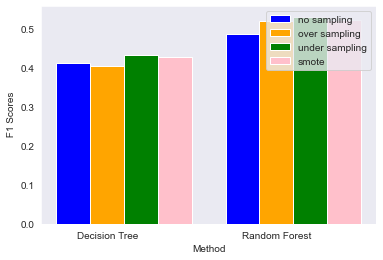

In [224]:
methods=['Decision Tree','Random Forest']
sampling=['no sampling','over sampling','under sampling','smote']
x=np.arange(2)
width=0.2

plt.bar(x-0.2, f1_no_sampling, width,color='blue')
plt.bar(x, f1_over_sampling, width,color ='orange')
plt.bar(x+0.2, f1_under_sampling,width,color='green')
plt.bar(x+0.4, f1_smote_sampling, width,color='pink')
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel(' F1 Scores')
plt.xlabel('Method')
ax.set_title('Scores by method and sampling')
plt.xticks(x,methods)
plt.legend(sampling)

plt.show()